# Linear Regression [Project 3]

* Reading Data Set

In [ ]:
#pip install --user pandas-profiling
#pip install plotly
#pip install cufflinks
#plotly and cufflinks use for iplot

#LIME
#FeatureTools

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
from scipy import stats

from pandas_profiling import ProfileReport

# Changing working directory.

import os
path=os.getcwd()
new_path=os.chdir('D:\\Rishabh\\Python')

In [ ]:
train_data = pd.read_csv(r"D:\Rishabh\Python\P3 Data\counterfeit_train.csv")
test_data  = pd.read_csv(r"D:\Rishabh\Python\P3 Data\counterfeit_test.csv")

#train_data.head()
#test_data.head()

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


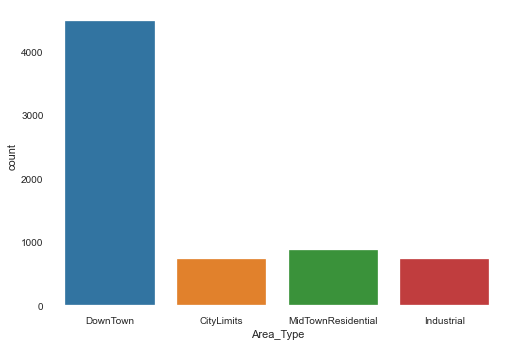

In [ ]:
sns.countplot(train_data['Area_Type'])

In [ ]:
print(train_data.shape, test_data.shape)

(6818, 12) (1705, 11)


* Pre-DEA

In [ ]:
test_data['Counterfeit_Sales'] = np.nan
test_data.shape

(1705, 12)

In [ ]:
# In order to make columns arrangement similar for proper concatenation.
test_data = test_data[train_data.columns]

In [ ]:
train_data['data'] = 'train'
test_data['data']  =  'test'

all_data = pd.concat([train_data, test_data], axis=0)
#all_data.describe()

In [ ]:
all_data.dtypes

Medicine_ID             object
Counterfeit_Weight     float64
DistArea_ID             object
Active_Since             int64
Medicine_MRP           float64
Medicine_Type           object
SidEffect_Level         object
Availability_rating    float64
Area_Type               object
Area_City_Type          object
Area_dist_level         object
Counterfeit_Sales      float64
data                    object
dtype: object

In [ ]:
city=train_data['Area_Type'].unique()
for col in city:
    print(col)
    print(train_data.loc[train_data['Area_Type'] ==col, 'Counterfeit_Sales'].sum())

DownTown
10849748.4162
CityLimits
2772607.364
MidTownResidential
390970.48740000004
Industrial
1535691.898


In [ ]:
train_data.loc[train_data['Area_Type'] =='DownTown', 'Counterfeit_Sales'].sum()

10849748.4162

In [ ]:
# Gives number of missing values and unique values in columns
for col in all_data.columns:
    print("---------"+str(col)+"---------"+str(all_data[col].dtypes))
    print('Number of Unique value: '+str(all_data[col].nunique()))
    print('Number of missing value: '+str(all_data[col].isnull().sum()))

# OR
all_data.isnull().sum()

---------Medicine_ID---------object
Number of Unique value: 1557
Number of missing value: 0
---------Counterfeit_Weight---------float64
Number of Unique value: 415
Number of missing value: 1463
---------DistArea_ID---------object
Number of Unique value: 10
Number of missing value: 0
---------Active_Since---------int64
Number of Unique value: 9
Number of missing value: 0
---------Medicine_MRP---------float64
Number of Unique value: 5970
Number of missing value: 0
---------Medicine_Type---------object
Number of Unique value: 16
Number of missing value: 0
---------SidEffect_Level---------object
Number of Unique value: 2
Number of missing value: 0
---------Availability_rating---------float64
Number of Unique value: 7884
Number of missing value: 0
---------Area_Type---------object
Number of Unique value: 4
Number of missing value: 0
---------Area_City_Type---------object
Number of Unique value: 3
Number of missing value: 0
---------Area_dist_level---------object
Number of Unique value: 4
Nu

Medicine_ID               0
Counterfeit_Weight     1463
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales      1705
data                      0
dtype: int64

## Replacing NA with mean value.

In [ ]:
k=0
for col in all_data:
    print(col)
    if (any(all_data.loc[all_data[col].isnull(),col]) and col not in ['data','Counterfeit_Sales']):
        print('Replaceing NaN with mean for column : '+str(col))
        #k=all_data.loc[all_data[col].isnull(),col] = all_data.loc[all_data['data'] == 'train', col].mean() 
        k=all_data.loc[all_data[col].isnull(),col] = all_data.loc[all_data['data'] == 'train', col].mean()
        print(k) 

Medicine_ID
Counterfeit_Weight
Replaceing NaN with mean for column : Counterfeit_Weight
14.115056617126996
DistArea_ID
Active_Since
Medicine_MRP
Medicine_Type
SidEffect_Level
Availability_rating
Area_Type
Area_City_Type
Area_dist_level
Counterfeit_Sales
data


### Working with Correlation

In [ ]:
x1=all_data.loc[all_data['Counterfeit_Sales'].notnull(), 'Counterfeit_Sales']
x2=all_data['Counterfeit_Weight']

In [ ]:
all_data.corr()
#train_data.corr()

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales
Counterfeit_Weight,1.000000,-0.016590,0.028523,-0.017632,0.005959
Active_Since,-0.016590,1.000000,0.002996,-0.075744,-0.039595
Medicine_MRP,0.028523,0.002996,1.000000,-0.003216,0.573684
Availability_rating,-0.017632,-0.075744,-0.003216,1.000000,-0.124058
Counterfeit_Sales,0.005959,-0.039595,0.573684,-0.124058,1.000000


In [ ]:
#pd.plotting.scatter_matrix(all_data)
##pd.plotting.scatter_matrix(all_data, diagonal = 'kde') #for density plot
#plt.show()

## Using heatmap.
* heatmap gives a better understanding when there are multiple columns for correlation test

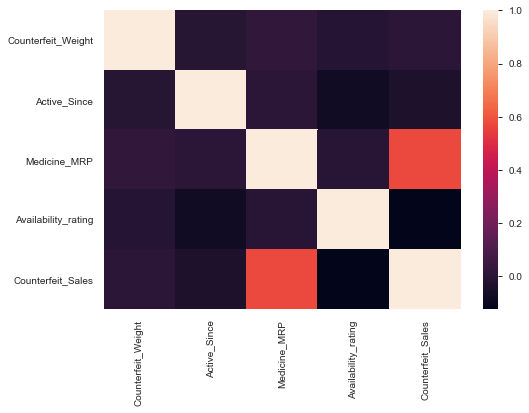

In [ ]:
sns.heatmap(all_data.corr())

## Bivariate Analysis

* Joint Plot

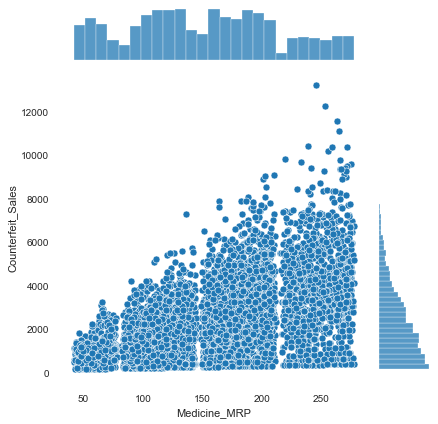

In [ ]:
sns.jointplot(x='Medicine_MRP', y='Counterfeit_Sales', data=train_data)

* Hex plot

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


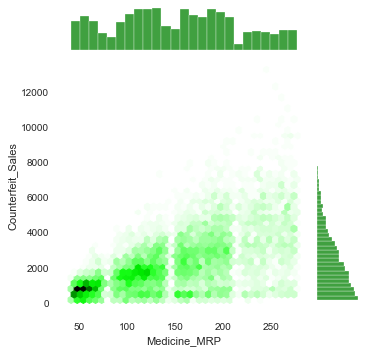

In [ ]:
sns.jointplot(x='Medicine_MRP', y='Counterfeit_Sales', kind ="hex", size=5, color="g",data=train_data)

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


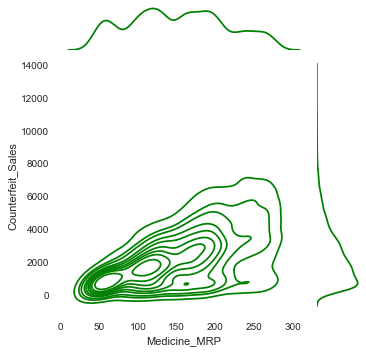

In [ ]:
sns.jointplot(x='Medicine_MRP', y='Counterfeit_Sales', kind ="kde", size=5, color="g",data=train_data)

In [ ]:
#sns.lmplot('Medicine_MRP', 'Counterfeit_Sales', data=train_data, fit_reg=True) #setting order can give polynomial relation
#sns.lmplot('Medicine_MRP', 'Counterfeit_Sales', data=train_data, fit_reg=True,order=3)

* To add other categorical variable fr analysis

In [ ]:
#sns.lmplot('Medicine_MRP', 'Counterfeit_Sales', hue="gender",col="status",data=eb,fit_reg=False,size=3)

 ### Detecting outliers in Data

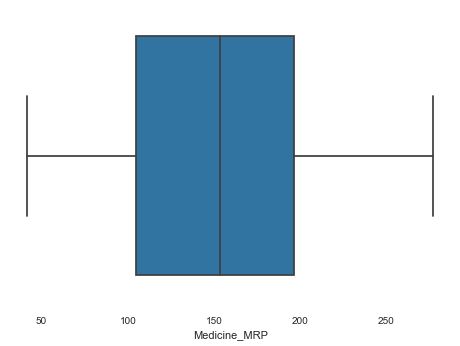

In [ ]:
sns.boxplot(x=train_data['Medicine_MRP'])

 ### Using Z-Score

* Z-Score gives the score by normalizing whole data with mean=0 and SD=1, i.e whole data follows gaussian distribution.
    then the values whose score is gt than 3 and less than -3 are treates as outliers.

In [ ]:
zscore_comp = np.abs(stats.zscore(all_data['Counterfeit_Weight']))

threshold=3
print(np.where(zscore_comp>threshold))

(array([], dtype=int64),)


In [ ]:
zscore_comp = np.abs(stats.zscore(all_data['Medicine_MRP']))

threshold=3
print(np.where(zscore_comp>threshold))

(array([], dtype=int64),)


### Using IQR to find outiers
* IQR is not afected by outliers,
* Outliers :  which does not come in range 
* range    :  [ (Q1 - 1.5 * IQR) to (Q3 + 1.5 * IQR) ]

## Finding Categorical variables

In [ ]:
all_data.select_dtypes(['object']).columns

Index(['Medicine_ID', 'DistArea_ID', 'Medicine_Type', 'SidEffect_Level',
       'Area_Type', 'Area_City_Type', 'Area_dist_level', 'data'],
      dtype='object')

In [ ]:
all_data.describe()

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,6818.000000
mean,14.150335,1995.831867,151.292782,0.079132,2280.583480
std,4.226154,8.371760,62.275067,0.051598,1693.354404
min,5.855000,1983.000000,41.590000,0.013000,146.290000
25%,10.610000,1985.000000,104.126500,0.039989,933.265600
50%,14.115057,1997.000000,153.312800,0.066931,1902.670400
75%,17.300000,2002.000000,195.943700,0.107585,3207.638400
max,22.650000,2007.000000,277.188400,0.341391,13199.964800


In [ ]:
all_data.head(10)

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data
0,RRA15,13.100000,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026,train
1,YVV26,14.115057,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520,train
2,LJC15,9.025000,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920,train
3,GWC40,11.800000,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130,train
4,QMN13,14.115057,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402,train
5,JDG81,8.775000,Area045,2000,165.5656,Antiseptics,mild,0.088881,DownTown,Tier 2,Unknown,3047.8464,train
6,KPX48,18.000000,Area018,2007,156.9102,Hreplacements,critical,0.051685,Industrial,Tier 3,Medium,2883.3938,train
7,CYW14,7.680000,Area013,1985,154.3470,Antiseptics,mild,0.028150,DownTown,Tier 3,High,3262.2340,train
8,TVF57,18.550000,Area046,1995,107.3068,Hreplacements,critical,0.060266,DownTown,Tier 1,Small,1959.9292,train
9,MGU75,9.510000,Area013,1985,161.1392,Statins,mild,0.023755,DownTown,Tier 3,High,3095.7840,train


## Categorical and Continuous variables
* Performing ANOVA (Analysis of Variance) if categories are more than 2

In [2]:
#sns.catplot(x='Medicine_Type', y='Counterfeit_Sales', kind ='bar',data = all_data)
#sns.catplot(x='Medicine_Type', y='Counterfeit_Sales', jitter=True,data = all_data)

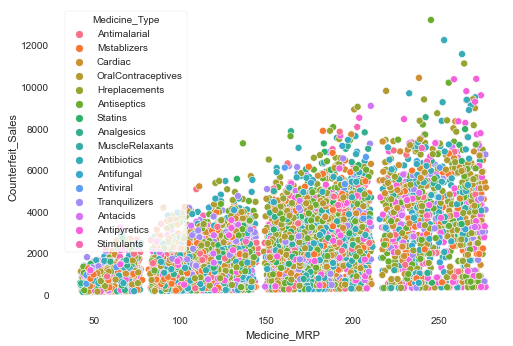

In [ ]:
sns.scatterplot(x='Medicine_MRP', y='Counterfeit_Sales', data=all_data, hue='Medicine_Type')

In [ ]:
#Pandas profiling helps to study whole data set with diffrent correlation values and detailing of each column
#disadvatage it takes too much time for large dataset
all_data.profile_report()

In [ ]:
#Columns to be dropped which are not required.
# Medicine_ID
#Columns for one-hot encoding
#DistArea_ID, Active_Since, Medicine_Type

In [ ]:
cat_col = ['SidEffect_Level','Area_Type','Area_City_Type','Area_dist_level','Medicine_Type']
#cat_col = ['DistArea_ID','Active_Since','SidEffect_Level','Area_Type','Area_City_Type','Area_dist_level','Medicine_Type']
#cat_col = ['Active_Since','SidEffect_Level','Area_Type','Area_City_Type','Area_dist_level','Medicine_Type']
#cat_col = ['Active_Since','SidEffect_Level','Area_Type','Area_City_Type','Area_dist_level','Medicine_Type']

In [ ]:
train_data.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
       'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level',
       'Counterfeit_Sales', 'data'],
      dtype='object')

In [ ]:
all_data.select_dtypes(['object']).columns

Index(['Medicine_ID', 'DistArea_ID', 'Medicine_Type', 'SidEffect_Level',
       'Area_Type', 'Area_City_Type', 'Area_dist_level', 'data'],
      dtype='object')

In [ ]:
#Starting to make data model

In [ ]:
all_data.drop(['Medicine_ID'], axis=1,inplace=True)
all_data.drop(['DistArea_ID'], axis=1,inplace=True)
all_data.drop(['Active_Since'],axis=1,inplace=True)
#all_data.drop('Medicine_Type', axis=1, inplace=True)

In [ ]:
for col in cat_col:
    k=all_data[col].value_counts().astype(str)[:-1]
    for cat in k.index:
        name = col+'_'+str(cat)
        all_data[name]=(all_data[col] == cat).astype(int)
        print(name)
    del all_data[col]
    print (col)

SidEffect_Level_mild
SidEffect_Level
Area_Type_DownTown
Area_Type_MidTownResidential
Area_Type_CityLimits
Area_Type
Area_City_Type_Tier 3
Area_City_Type_Tier 2
Area_City_Type
Area_dist_level_Medium
Area_dist_level_Unknown
Area_dist_level_Small
Area_dist_level
Medicine_Type_Antibiotics
Medicine_Type_Hreplacements
Medicine_Type_Antiseptics
Medicine_Type_OralContraceptives
Medicine_Type_Antipyretics
Medicine_Type_Cardiac
Medicine_Type_Mstablizers
Medicine_Type_Tranquilizers
Medicine_Type_Analgesics
Medicine_Type_Antimalarial
Medicine_Type_Antacids
Medicine_Type_Statins
Medicine_Type_MuscleRelaxants
Medicine_Type_Antifungal
Medicine_Type_Stimulants
Medicine_Type


In [ ]:
# Medicine_Type
# col = 'Medicine_Type'
# k=(all_data[col].value_counts(normalize=True)*100).astype(str)
# for cat, val in k.items():
#     if float(val) > 4:
#         name = col+'_'+cat
#         all_data[name] = (all_data[col] == cat).astype(int)
#         print(name)
# del all_data['Medicine_Type']

In [ ]:
train_data_p = all_data[all_data['data'] == 'train']
test_data_p  = all_data[all_data['data'] == 'test']

In [ ]:
del train_data_p['data']
del test_data_p['data']
del test_data_p['Counterfeit_Sales']

In [ ]:
train_data_p.dtypes

Counterfeit_Weight                  float64
Medicine_MRP                        float64
Availability_rating                 float64
Counterfeit_Sales                   float64
SidEffect_Level_mild                  int32
Area_Type_DownTown                    int32
Area_Type_MidTownResidential          int32
Area_Type_CityLimits                  int32
Area_City_Type_Tier 3                 int32
Area_City_Type_Tier 2                 int32
Area_dist_level_Medium                int32
Area_dist_level_Unknown               int32
Area_dist_level_Small                 int32
Medicine_Type_Antibiotics             int32
Medicine_Type_Hreplacements           int32
Medicine_Type_Antiseptics             int32
Medicine_Type_OralContraceptives      int32
Medicine_Type_Antipyretics            int32
Medicine_Type_Cardiac                 int32
Medicine_Type_Mstablizers             int32
Medicine_Type_Tranquilizers           int32
Medicine_Type_Analgesics              int32
Medicine_Type_Antimalarial      

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data_p1, train_data_p2 = train_test_split(train_data_p, test_size=0.2, random_state=2)

In [ ]:
train1 = train_data_p1.drop('Counterfeit_Sales', axis=1)
train2 = train_data_p1['Counterfeit_Sales']
train3 = train_data_p2['Counterfeit_Sales']
train4 = train_data_p2.drop('Counterfeit_Sales', axis =1)
#train_data_p2 = train_data_p1['Counterfeit_Sales']

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(train1, train2)

LinearRegression()

In [ ]:
lr.intercept_

-199.73584174423695

In [ ]:
coef_variables = pd.DataFrame(lr.coef_ , train1.columns, columns= ['Coefficient'])

In [ ]:
coef_variables

,Coefficient
Counterfeit_Weight,-4.758463
Medicine_MRP,15.426063
Availability_rating,-270.445528
SidEffect_Level_mild,1.516110
Area_Type_DownTown,527.807552
Area_Type_MidTownResidential,-1378.871263
Area_Type_CityLimits,1743.185903
Area_City_Type_Tier 3,144.440748
Area_City_Type_Tier 2,133.145885
Area_dist_level_Medium,220.813684


In [ ]:
train_p1 = train_data_p2.drop('Counterfeit_Sales', axis=1)

In [ ]:
predicted_val = lr.predict(train_p1)

In [ ]:
def rmse (predicted, actual):
    return np.sqrt(((predicted-actual)**2).mean())

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(train_data_p2['Counterfeit_Sales'], predicted_val)

830.9422279648995

In [ ]:
#calculating rmse
rmse(train3, predicted_val)

1133.9620857555442

In [ ]:
#calculating R2 Score
from sklearn.metrics import r2_score
r2_score(train3,predicted_val)

0.5519452483155689

## Fitting Model with statsmodel [Statistical Way of doing Linear Reg]

In [ ]:
import statsmodels.api as sm

sm.add_constant(train1)
statModel_result = sm.OLS(train2, train1).fit()

In [ ]:
statModel_result.summary()

#prob(omnibus) < 0.05 says that data is normal and if grater than 0.05 then data is not normal
#eigen vlaue near 0 indicates multicollinearity.

# As R^2 is directly proportional to VIF i.e VIF cutt off should be 10 i.e R2 should be 0.90(rang of R2 0 to 1),
#       Hence R2 > 0.90 means VIF > 10 means there is multicollinearity

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Counterfeit_Sales   R-squared (uncentered):                   0.847
Model:                            OLS   Adj. R-squared (uncentered):              0.847
Method:                 Least Squares   F-statistic:                              1116.
Date:                Mon, 05 Oct 2020   Prob (F-statistic):                        0.00
Time:                        23:24:27   Log-Likelihood:                         -45977.
No. Observations:                5454   AIC:                                  9.201e+04
Df Residuals:                    5427   BIC:                                  9.219e+04
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Counterfeit_Weight                  -5.2004      3.538     -1.470      0.142     -12.137       1.736
Medicine_MRP                        15.4047      0.241     64.013      0.000      14.933      15.876
Availability_rating               -292.4536    303.428     -0.964      0.335    -887.294     302.387
SidEffect_Level_mild                -0.2078     34.548     -0.006      0.995     -67.936      67.521
Area_Type_DownTown                 469.2062     84.951      5.523      0.000     302.667     635.745
Area_Type_MidTownResidential     -1419.3095     97.736    -14.522      0.000   -1610.912   -1227.707
Area_Type_CityLimits              1737.7309     64.425     26.973      0.000    1611.431    1864.030
Area_City_Type_Tier 3               96.3057     72.729      1.324      0.185     -46.272     238.883
Area_City_Type_Tier 2              123.1822     62.618      1.967      0.049       0.426     245.939
Area_dist_level_Medium             162.2239     84.582      1.918      0.055      -3.591     328.038
Area_dist_level_Unknown            -25.8659     89.405     -0.289      0.772    -201.136     149.404
Area_dist_level_Small               92.0405     90.769      1.014      0.311     -85.903     269.984
Medicine_Type_Antibiotics         -358.2872    146.138     -2.452      0.014    -644.777     -71.797
Medicine_Type_Hreplacements       -456.4979    146.715     -3.111      0.002    -744.117    -168.879
Medicine_Type_Antiseptics         -451.8823    150.204     -3.008      0.003    -746.342    -157.423
Medicine_Type_OralContraceptives  -423.0455    148.037     -2.858      0.004    -713.257    -132.834
Medicine_Type_Antipyretics        -488.5193    150.353     -3.249      0.001    -783.272    -193.767
Medicine_Type_Cardiac             -349.0193    150.168     -2.324      0.020    -643.409     -54.630
Medicine_Type_Mstablizers         -439.1805    149.465     -2.938      0.003    -732.192    -146.169
Medicine_Type_Tranquilizers       -499.9309    154.415     -3.238      0.001    -802.645    -197.216
Medicine_Type_Analgesics          -433.2644    154.952     -2.796      0.005    -737.033    -129.496
Medicine_Type_Antimalarial        -422.7148    155.086     -2.726      0.006    -726.746    -118.683
Medicine_Type_Antacids            -431.7623    163.761     -2.637      0.008    -752.800    -110.724
Medicine_Type_Statins             -363.1128    172.609     -2.104      0.035    -701.495     -24.730
Medicine_Type_MuscleRelaxants     -327.6313    177.818     -1.843      0.065    -676.227      20.964
Medicine_Type_Antifungal          -432.3883    186.909     -2.313      0.021    -798.805     -65.971
Medicine_Type_Stimulants          -385.2739    193.109 

In [ ]:
#results
print('\tR squared value is : {0}\n\tAdjusted R squared is : {1}'.format(statModel_result.rsquared,statModel_result.rsquared_adj))

	R squared value is : 0.8473795548222438
	Adjusted R squared is : 0.846620249124842


### VIF

In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# def calc_vif(df):
#     Vif = pd.DataFrame()
#     Vif['Variables'] = df.columns
#     Vif['VIF_Score'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
#     return(Vif)   

# all_data_vif = all_data.drop(['data','Counterfeit_Sales'], axis=1)
# calc_vif(all_data_vif)

In [ ]:
 # act_train_data    = train_data_p.drop('Counterfeit_Sales', axis=1)
# act_train_data_tg = train_data_p['Counterfeit_Sales']

# lr.fit(act_train_data, act_train_data_tg)

# predVal = lr.predict(test_data_p)

# pd.DataFrame(test_pred).to_csv("RishabhSingh.csv",index=False)

In [ ]:
test_data_p.head()

,Counterfeit_Weight,Medicine_MRP,Availability_rating,SidEffect_Level_mild,Area_Type_DownTown,Area_Type_MidTownResidential,Area_Type_CityLimits,Area_City_Type_Tier 3,Area_City_Type_Tier 2,Area_dist_level_Medium,...,Medicine_Type_Cardiac,Medicine_Type_Mstablizers,Medicine_Type_Tranquilizers,Medicine_Type_Analgesics,Medicine_Type_Antimalarial,Medicine_Type_Antacids,Medicine_Type_Statins,Medicine_Type_MuscleRelaxants,Medicine_Type_Antifungal,Medicine_Type_Stimulants
0,14.115057,85.5328,0.112747,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,13.450000,257.1460,0.144446,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,7.100000,98.1172,0.144221,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,18.300000,135.3730,0.100388,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,14.115057,112.8016,0.022585,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

hp = np.linspace(1,100,100)

params = {'alpha':hp}

model = Ridge(fit_intercept=True)

grid_search=GridSearchCV(model, param_grid=params, cv=10, scoring='neg_mean_absolute_error')

grid_search.fit(train1, train2)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])},
             scoring='neg_mean_absolute_error')

In [ ]:
grid_search.best_estimator_

Ridge(alpha=42.0)

In [ ]:
grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_alpha', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
def overview(result, n_top = 3):
    for val in range (1, n_top+1):
        val_index = np.flatnonzero(result['rank_test_score'] == val)
        for i in val_index:
            print('Model with Rank {0}'.format(val))
            print('\tStandard Deviation : {0}'.format(result['std_test_score'][i]))
            print('\tMean Test Score : {0}'.format(result['mean_test_score'][i]))
            print('\tParameters :{0}'.format(result['params'][i]))


In [ ]:
overview(grid_search.cv_results_)

Model with Rank 1
	Standard Deviation : 29.94720577972568
	Mean Test Score : -827.5330503853023
	Parameters :{'alpha': 42.0}
Model with Rank 2
	Standard Deviation : 29.976800545072223
	Mean Test Score : -827.5333425361353
	Parameters :{'alpha': 43.0}
Model with Rank 3
	Standard Deviation : 29.917410305111517
	Mean Test Score : -827.5338341737521
	Parameters :{'alpha': 41.0}


## For Coeffficients

In [ ]:
ridge_model = grid_search.best_estimator_

In [ ]:
ridge_model.fit(train1, train2)

Ridge(alpha=42.0)

In [ ]:
prd_val=ridge_model.predict(test_data_p)

In [ ]:
len(prd_val)

1705

In [ ]:
pd.DataFrame(prd_val).to_csv("Rishabh_Singh_P3_part2.csv", index=False)

In [ ]:
list(zip(train1.columns, ridge_model.coef_))

[('Counterfeit_Weight', -4.7601685682217845),
 ('Medicine_MRP', 15.423357883800229),
 ('Availability_rating', -105.63326701106315),
 ('SidEffect_Level_mild', -1.116439883866992),
 ('Area_Type_DownTown', 491.0070541817224),
 ('Area_Type_MidTownResidential', -1259.2373249722327),
 ('Area_Type_CityLimits', 1573.9384495517131),
 ('Area_City_Type_Tier 3', 125.19919294287266),
 ('Area_City_Type_Tier 2', 211.8498796784185),
 ('Area_dist_level_Medium', 230.19763526526754),
 ('Area_dist_level_Unknown', -109.75030020147484),
 ('Area_dist_level_Small', 47.767891268327915),
 ('Medicine_Type_Antibiotics', 34.5916126856092),
 ('Medicine_Type_Hreplacements', -55.85500008744406),
 ('Medicine_Type_Antiseptics', -48.92524502205841),
 ('Medicine_Type_OralContraceptives', -23.545562039293134),
 ('Medicine_Type_Antipyretics', -87.42856108013677),
 ('Medicine_Type_Cardiac', 44.4396397730832),
 ('Medicine_Type_Mstablizers', -38.78597700277388),
 ('Medicine_Type_Tranquilizers', -88.81068469304297),
 ('Medicin

## Lasso Regression

In [ ]:
hp=np.linspace(1,100,100)
params={'alpha':hp}

modelLasso = Lasso(fit_intercept=True)

grid_search=GridSearchCV(modelLasso, param_grid=params,cv=10,scoring='neg_mean_absolute_error')


In [ ]:
grid_search.fit(train1,train2)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])},
             scoring='neg_mean_absolute_error')

In [ ]:
#grid_search.estimator.get_params().keys()

In [ ]:
grid_search.best_estimator_

Lasso(alpha=11.0)

In [ ]:
overview(grid_search.cv_results_)

Model with Rank 1
	Standard Deviation : 28.72147828138965
	Mean Test Score : -824.9950594879153
	Parameters :{'alpha': 11.0}
Model with Rank 2
	Standard Deviation : 28.853526180223845
	Mean Test Score : -825.0172350051696
	Parameters :{'alpha': 12.0}
Model with Rank 3
	Standard Deviation : 28.60896461522822
	Mean Test Score : -825.0176754225256
	Parameters :{'alpha': 10.0}


In [ ]:
lasso_model=grid_search.best_estimator_

In [ ]:
list(zip(train1.columns, lasso_model.coef_))

[('Counterfeit_Weight', -4.406837400128573),
 ('Medicine_MRP', 15.415241913938255),
 ('Availability_rating', -0.0),
 ('SidEffect_Level_mild', -0.0),
 ('Area_Type_DownTown', 222.98954447216818),
 ('Area_Type_MidTownResidential', -1623.573702949156),
 ('Area_Type_CityLimits', 1539.8683817336744),
 ('Area_City_Type_Tier 3', -0.0),
 ('Area_City_Type_Tier 2', 0.0),
 ('Area_dist_level_Medium', 0.0),
 ('Area_dist_level_Unknown', -0.0),
 ('Area_dist_level_Small', 0.0),
 ('Medicine_Type_Antibiotics', 0.0),
 ('Medicine_Type_Hreplacements', -0.0),
 ('Medicine_Type_Antiseptics', -0.0),
 ('Medicine_Type_OralContraceptives', -0.0),
 ('Medicine_Type_Antipyretics', -0.0),
 ('Medicine_Type_Cardiac', 0.0),
 ('Medicine_Type_Mstablizers', -0.0),
 ('Medicine_Type_Tranquilizers', -0.0),
 ('Medicine_Type_Analgesics', -0.0),
 ('Medicine_Type_Antimalarial', 0.0),
 ('Medicine_Type_Antacids', -0.0),
 ('Medicine_Type_Statins', 0.0),
 ('Medicine_Type_MuscleRelaxants', 0.0),
 ('Medicine_Type_Antifungal', -0.0),
 ('